In [42]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

train_data = pd.read_csv(r"D:\depi\tech\New folder\titanic\train.csv")
test_data = pd.read_csv(r"D:\depi\tech\New folder\titanic\test.csv")


In [2]:

print(train_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:

print(train_data.shape)

print("="*100)

print(train_data.info())

print("="*100)

print(train_data.describe())

print("="*100)
print(train_data['Survived'].value_counts())


(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842 

In [4]:
print(train_data.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:

train_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())

train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])

train_data.drop("Cabin", axis=1, inplace=True)


In [7]:

print(train_data["Embarked"].value_counts())


Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [8]:
train_data["Sex"] = train_data["Sex"].map({"male": 0, "female": 1})
train_data["Embarked"] = train_data["Embarked"].map({"S": 0, "C": 1, "Q": 2})


In [9]:
print(train_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


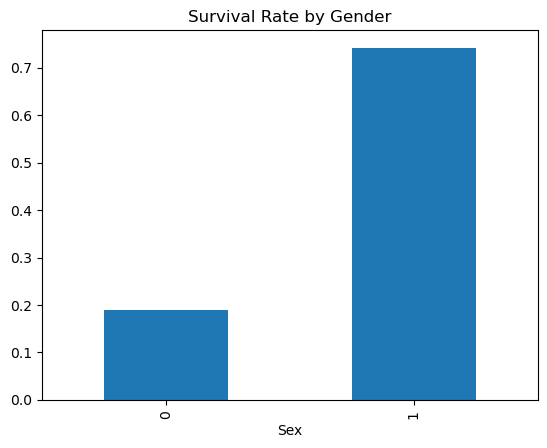

In [10]:
import matplotlib.pyplot as plt

train_data.groupby("Sex")["Survived"].mean().plot(kind="bar")
plt.title("Survival Rate by Gender")
plt.show()


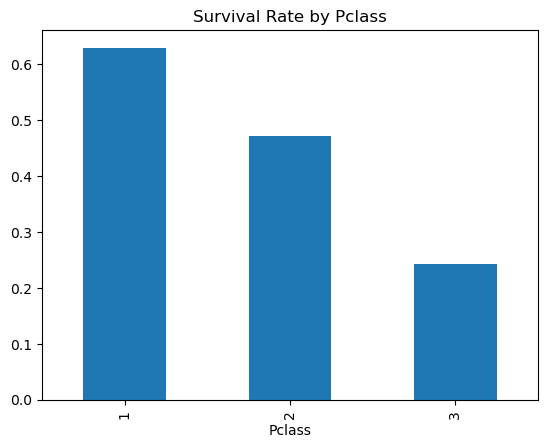

In [11]:
train_data.groupby("Pclass")["Survived"].mean().plot(kind="bar")
plt.title("Survival Rate by Pclass")
plt.show()

In [12]:
train_data = train_data.drop(["Name", "Ticket"], axis=1)


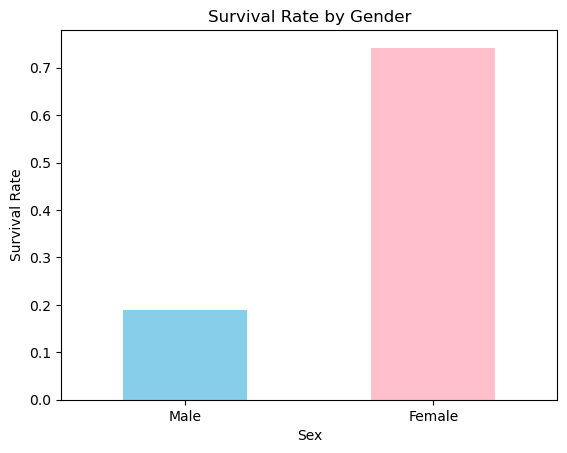

In [13]:
import matplotlib.pyplot as plt


survival_rate_by_gender = train_data.groupby("Sex")["Survived"].mean()


colors = ['skyblue', 'pink']
survival_rate_by_gender.plot(kind="bar", color=colors)


plt.title("Survival Rate by Gender")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")

plt.xticks(ticks=[0,1], labels=["Male","Female"], rotation=0)

plt.show()


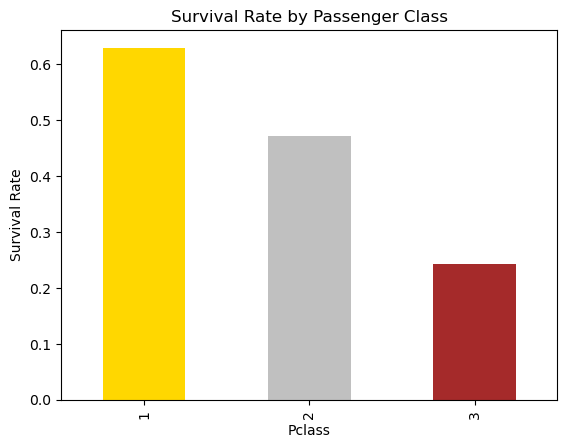

In [50]:
survival_rate_by_pclass = train_data.groupby("Pclass")["Survived"].mean()
survival_rate_by_pclass.plot(kind="bar", color=['gold','silver','brown'])
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Survival Rate")
plt.show()


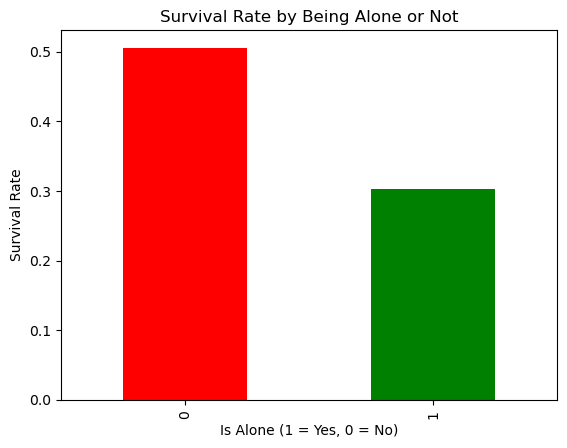

In [15]:
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1
train_data["IsAlone"] = 1
train_data.loc[train_data["FamilySize"] > 1, "IsAlone"] = 0


survival_rate_by_alone = train_data.groupby("IsAlone")["Survived"].mean()
survival_rate_by_alone.plot(kind="bar", color=['red', 'green'])
plt.title("Survival Rate by Being Alone or Not")
plt.xlabel("Is Alone (1 = Yes, 0 = No)")
plt.ylabel("Survival Rate")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X = train_data.drop("Survived", axis=1)
y = train_data["Survived"]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8379888268156425


In [30]:

test_passenger_id = test_data["PassengerId"]

test_data["Age"] = test_data["Age"].fillna(test_data["Age"].median())
test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].median())


test_data["Sex"] = test_data["Sex"].map({"male": 0, "female": 1})
test_data["Embarked"] = test_data["Embarked"].map({"S": 0, "C": 1, "Q": 2})

train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True, errors='ignore')




In [48]:
# Define features to use
features = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "IsAlone"]

# Prepare training and test sets
X_train = train_data[features]
y_train = train_data["Survived"]
X_test = test_data[features]

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Save predictions
predictions = pd.DataFrame({
    "PassengerId": test_passenger_id,
    "Survived": y_pred
})
predictions.to_csv("titanic_predictions.csv", index=False)
print("Predictions saved! Total passengers:", len(predictions))

Predictions saved! Total passengers: 418
